# Cosine Similarity

## 1. Cosine Similarity란?

> 두 벡터가 **얼마나 같은 방향을 향하고 있는지**를 수치로 나타낸다.  
> 벡터의 **크기(길이)는 무시**하고, 오직 **방향만 비교**한다.

### ▶ 결과 범위:
- **1**: 완전히 같은 방향
- **0**: 서로 직각 (무관함)
- **–1**: 정반대 방향

Cosine Similarity는 주로 벡터 기반의 데이터(문서, 이미지, 임베딩 등)에서 **유사도를 측정**할 때 많이 사용된다.


## 2. 수식 정의

$$
\text{cosine\_similarity}(\mathbf{A}, \mathbf{B}) = \frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\| \cdot \|\mathbf{B}\|}
$$

- $\mathbf{A} \cdot \mathbf{B}$: **내적 (dot product)** = 방향 + 크기 정보 포함  
- $\|\mathbf{A}\|, \|\mathbf{B}\|$: 각 벡터의 **크기 (norm)** = 피타고라스식 거리

이 공식은 **내적에 포함된 크기 정보를 분모에서 제거함으로써, 방향만 비교하는 형태**가 된다.


## 3. 왜 이렇게 계산할까?

벡터 내적의 기본 정의는 다음과 같다:

$$
\mathbf{A} \cdot \mathbf{B} = \sum_{i=1}^n A_i B_i = \|\mathbf{A}\| \cdot \|\mathbf{B}\| \cdot \cos(\theta)
$$

- $\sum A_i B_i$: 각 성분끼리 곱해서 더한 값 (원소 단위 내적)  
- $\|\mathbf{A}\| = \sqrt{\sum A_i^2}$, $\|\mathbf{B}\| = \sqrt{\sum B_i^2}$: 각 벡터의 크기 (L2 norm)  
- $\cos(\theta)$: 두 벡터 사이 각도의 코사인 값

이 수식을 $\cos(\theta)$에 대해 정리하면:

$$
\cos(\theta) = \frac{\sum_{i=1}^n A_i B_i}{\sqrt{\sum A_i^2} \cdot \sqrt{\sum B_i^2}}
$$

결국, cosine similarity는 **두 벡터 사이의 각도** $\theta$에 대한 cosine 값을 직접 계산한 것과 같다.  
내적의 크기 요소를 제거하고 **순수하게 방향성만 남긴 값**이다.


## 5. cosine similarity 값 해석 예시

| 값 | 의미 |
|------|------|
| **1.0** | 0°, 같은 방향 (완전 유사) |
| **0.0** | 90°, 수직 (무관함) |
| **-1.0** | 180°, 반대 방향 (완전 반대) |


## 6. cosine similarity vs dot product

| 항목 | Cosine Similarity | Dot Product (내적) |
|------|--------------------|---------------------|
| 비교 대상 | 방향만 | 방향 + 크기 모두 |
| 정규화 여부 | O (길이 제거) | X (크기 영향 있음) |
| 결과 범위 | -1 ~ 1 | 제한 없음 (스케일 영향 받음) |
| 주 용도 | 유사도 판단 | 물리량, 점수 계산, 투영 등 |


## 7. 핵심 요약 (요지 정리)
Cosine similarity가 의미하는 건 단순히 “각 벡터가 어디를 향하고 있는가?”가 아니라,  
**“두 벡터가 얼마나 같은 방향을 함께 향하고 있는가”를 수치로 측정하는 것**이다.

- **cosine similarity는 내적에서 크기 요소를 제거해 방향만 비교하는 수단이다.**
- 벡터가 얼마나 같은 방향을 향하는지 -1 ~ 1 범위에서 나타내며, **문서 유사도, 임베딩 간 비교** 등에 자주 쓰인다.
- dot product는 크기까지 포함한 연산으로, 의미가 다르다.
- **벡터 자체를 비교하는 것** → 내적(dot product)은 크기와 방향 모두를 반영한다. 상호작용, 기여량, 에너지 등 실제 물리적 의미를 담을 수 있다.
- **벡터를 정규화하고 방향만 비교하는 것** → 코사인 유사도는 크기를 제거하고 오직 방향 유사도만 평가한다.
- **각도 기반 유사도**는 구분력, 의미적 유사성, 맥락적 연관성을 설명할 수 있고, 다양한 시간적/상황적 분석에도 연결된다.

> 참고 :
> - 각 벡터의 cos값만 따로 비교하는 방식은 충분하지 않다. 이는 각 벡터가 기준축(x축)과 이루는 각도만 알려줄 뿐, 두 벡터 간의 상대적인 관계는 보여주지 않는다.
> - 코사인 값의 부호만으로는 반대 방향을 판단하기 어렵다. 부호만 보면 180도인지 아닌지는 구분할 수 있지만, 일반적인 수치 비교에서는 방향성 정보가 손실되기 쉽다.
> - 기준축 기준으로 방향을 비교하는 방법도 있긴 하다. 하지만 대부분의 상황에서는 cosine similarity처럼 두 벡터 간 상대 각도를 직접 계산하는 것이 더 직관적이고 신뢰할 수 있는 방법이다.


## 8. 코드 예제 및 시각화

아래는 cosine similarity를 직접 계산하고, 벡터 간 방향을 시각화하는 예제

In [1]:
import numpy as np

def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# 예시 벡터
A = np.array([2, 1])
B = np.array([4, 2])
C = np.array([-1, 2])

print("cos(A, B):", cosine_similarity(A, B))  # ≈ 1.0
print("cos(A, C):", cosine_similarity(A, C))  # ≈ 0.0


cos(A, B): 0.9999999999999998
cos(A, C): 0.0


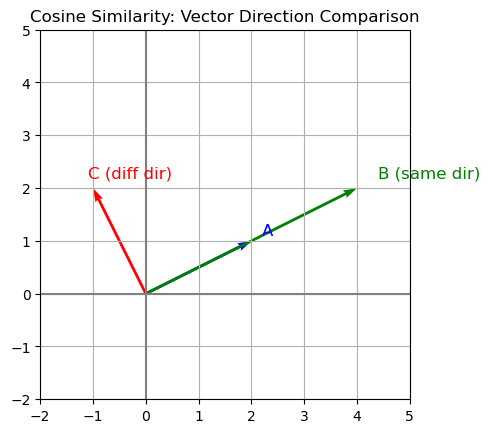

In [2]:
import matplotlib.pyplot as plt

def plot_vectors(vectors, labels, colors, title):
    origin = [0], [0]
    for vec, label, color in zip(vectors, labels, colors):
        plt.quiver(*origin, vec[0], vec[1], angles='xy', scale_units='xy', scale=1, color=color)
        plt.text(vec[0]*1.1, vec[1]*1.1, label, color=color, fontsize=12)
    plt.axhline(0, color='gray')
    plt.axvline(0, color='gray')
    plt.xlim(-2, 5)
    plt.ylim(-2, 5)
    plt.gca().set_aspect('equal')
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_vectors(
    vectors=[A, B, C],
    labels=["A", "B (same dir)", "C (diff dir)"],
    colors=["blue", "green", "red"],
    title="Cosine Similarity: Vector Direction Comparison"
)
